In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
nltk.download('vader_lexicon')

[nltk_data] Error loading vader_lexicon: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [3]:
yt = pd.read_csv('USvideos_modified.csv', encoding='latin1',dtype={'last_trending_date': str})
yt.head()

C:\Users\fajar\AppData\Local\Temp\ipykernel_17144\4229730100.py:1: DtypeWarning: Columns (0,2,5,10,11,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  yt = pd.read_csv('USvideos_modified.csv', encoding='latin1',dtype={'last_trending_date': str})


,video_id,last_trending_date,publish_date,publish_hour,category_id,channel_title,views,likes,dislikes,comment_count,...,tag_appeared_in_title,title,tags,description,trend_day_count,trend.publish.diff,trend_tag_highest,trend_tag_total,tags_count,subscriber
0,2kyS6SvSYSE,20-11-2017,13-11-2017,17.0,category_id,CaseyNeistat,2564903.0,96321.0,7972.0,22149.0,...,False,WE WANT TO TALK ABOUT OUR MARRIAGE,SHANtell martin,SHANTELL'S CHANNEL - https://www.youtube.com/s...,7.0,7.0,2.0,2.0,1.0,9086142.0
1,1ZAPwfrtAFY,20-11-2017,13-11-2017,7.0,category_id,LastWeekTonight,6109402.0,151250.0,11508.0,19820.0,...,False,The Trump Presidency: Last Week Tonight with J...,last week tonight trump presidency|last week t...,"One year after the presidential election, John...",7.0,7.0,65.0,69.0,4.0,5937292.0
2,5qpjK5DgCt4,20-11-2017,12-11-2017,19.0,category_id,Rudy Mancuso,5315471.0,187303.0,7278.0,9990.0,...,True,"Racist Superman | Rudy Mancuso, King Bach & Le...",racist superman|rudy|mancuso|king|bach|racist|...,WATCH MY PREVIOUS VIDEO ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï...,7.0,8.0,68.0,426.0,23.0,4191209.0
3,puqaWrEC7tY,20-11-2017,13-11-2017,11.0,category_id,Good Mythical Morning,913268.0,16729.0,1386.0,2988.0,...,True,Nickelback Lyrics: Real or Fake?,rhett and link|gmm|good mythical morning|rhett...,Today we find out if Link is a Nickelback amat...,7.0,7.0,488.0,1246.0,28.0,13186408.0
4,d380meD0W0M,19-11-2017,12-11-2017,18.0,category_id,nigahiga,2819118.0,153395.0,2416.0,20573.0,...,True,I Dare You: GOING BALD!?,ryan|higa|higatv|nigahiga|i dare you|idy|rhpc|...,I know it's been a while since we did this sho...,6.0,7.0,488.0,1007.0,14.0,20563106.0


In [178]:
#showing info of data
yt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 23 columns):
 #   Column                       Non-Null Count    Dtype         
---  ------                       --------------    -----         
 0   video_id                     4547 non-null     object        
 1   last_trending_date           0 non-null        datetime64[ns]
 2   publish_date                 4547 non-null     object        
 3   publish_hour                 4547 non-null     float64       
 4   category_id                  1048575 non-null  object        
 5   channel_title                4547 non-null     object        
 6   views                        4547 non-null     float64       
 7   likes                        4547 non-null     float64       
 8   dislikes                     4547 non-null     float64       
 9   comment_count                4547 non-null     float64       
 10  comments_disabled            4547 non-null     object        
 11  ratings_dis

In [180]:
#description of youtube
yt.describe()

,last_trending_date,publish_hour,views,likes,dislikes,comment_count,tag_appeared_in_title_count,trend_day_count,trend.publish.diff,trend_tag_highest,trend_tag_total,tags_count,subscriber
count,0,4547.000000,4.547000e+03,4.547000e+03,4.547000e+03,4.547000e+03,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000,4.525000e+03
mean,NaT,13.503189,1.265665e+06,3.919696e+04,2.616788e+03,4.938788e+03,2.961293,4.830658,34.429954,130.335386,437.941060,19.209369,3.164303e+06
min,NaT,0.000000,5.590000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,NaT,8.000000,9.089650e+04,1.486000e+03,7.600000e+01,2.260000e+02,1.000000,3.000000,5.000000,22.000000,68.000000,9.000000,2.466470e+05
50%,NaT,15.000000,3.188400e+05,7.397000e+03,2.910000e+02,8.540000e+02,3.000000,5.000000,6.000000,85.000000,217.000000,18.000000,1.198769e+06
75%,NaT,18.000000,1.006673e+06,2.557550e+04,1.023000e+03,2.862500e+03,4.000000,7.000000,7.000000,151.000000,515.000000,29.000000,3.766915e+06
max,NaT,23.000000,1.493761e+08,3.093544e+06,1.674420e+06,1.361580e+06,18.000000,14.000000,4215.000000,488.000000,3644.000000,69.000000,2.867694e+07
std,NaN,6.548420,4.526133e+06,1.419793e+05,3.662803e+04,3.110122e+04,2.482547,2.614707,247.514298,150.400756,616.584168,12.452361,4.831613e+06


In [153]:
#showing shape of data
print(f"The shape of youtube data is"yt.shape)

The shape of youtube data is (1048575, 23)


(         video_id last_trending_date publish_date  publish_hour  category_id  \
 0     2kyS6SvSYSE         20-11-2017   13-11-2017          17.0  category_id   
 1     1ZAPwfrtAFY         20-11-2017   13-11-2017           7.0  category_id   
 2     5qpjK5DgCt4         20-11-2017   12-11-2017          19.0  category_id   
 3     puqaWrEC7tY         20-11-2017   13-11-2017          11.0  category_id   
 4     d380meD0W0M         19-11-2017   12-11-2017          18.0  category_id   
 ...           ...                ...          ...           ...          ...   
 4543  _CFJ1u-DIBc         05-03-2018   02-03-2018          19.0  category_id   
 4544  Juad74hE6rs         05-03-2018   01-03-2018          16.0  category_id   
 4545  n_S8d_1KVhU         05-03-2018   01-03-2018          18.0  category_id   
 4546  Eouvsy8JdLU         05-03-2018   27-02-2018          16.0  category_id   
 4547          NaN                NaN          NaN           NaN  category_id   
 
               channel_tit

In [156]:
#removing duplicates and cleaning data
yt_clean=yt.drop_duplicates()
cleaned_shape=yt_clean.shape
yt_clean,cleaned_shape

(         video_id last_trending_date publish_date  publish_hour  category_id  \
 0     2kyS6SvSYSE         20-11-2017   13-11-2017          17.0  category_id   
 1     1ZAPwfrtAFY         20-11-2017   13-11-2017           7.0  category_id   
 2     5qpjK5DgCt4         20-11-2017   12-11-2017          19.0  category_id   
 3     puqaWrEC7tY         20-11-2017   13-11-2017          11.0  category_id   
 4     d380meD0W0M         19-11-2017   12-11-2017          18.0  category_id   
 ...           ...                ...          ...           ...          ...   
 4543  _CFJ1u-DIBc         05-03-2018   02-03-2018          19.0  category_id   
 4544  Juad74hE6rs         05-03-2018   01-03-2018          16.0  category_id   
 4545  n_S8d_1KVhU         05-03-2018   01-03-2018          18.0  category_id   
 4546  Eouvsy8JdLU         05-03-2018   27-02-2018          16.0  category_id   
 4547          NaN                NaN          NaN           NaN  category_id   
 
               channel_tit

In [160]:
# Initialize the VADER analyzer
analyzer = SentimentIntensityAnalyzer()
# Function to apply sentiment analysis
def get_sentiment(text):
    if pd.isna(text): 
        return {'neg': 0, 'neu': 0, 'pos': 0, 'compound': 0}
    return analyzer.polarity_scores(str(text))
# Apply to 'title' and 'tags'
title_sentiment = yt['title'].apply(get_sentiment).apply(pd.Series)
tags_sentiment = yt['tags'].apply(get_sentiment).apply(pd.Series)
# Rename columns for clarity
title_sentiment.columns = [f"title_{col}" for col in title_sentiment.columns]
tags_sentiment.columns = [f"tags_{col}" for col in tags_sentiment.columns]
# Combine with original dataframe
sentiment_df = pd.concat([yt, title_sentiment, tags_sentiment], axis=1)
print ("Sentiment Analysis")
# Show summary statistics
print(sentiment_df[['title_neg', 'title_neu', 'title_pos', 'title_compound',
                    'tags_neg', 'tags_neu', 'tags_pos', 'tags_compound']].describe())

Sentiment Analysis
          title_neg     title_neu     title_pos  title_compound      tags_neg  \
count  1.048575e+06  1.048575e+06  1.048575e+06    1.048575e+06  1.048575e+06   
mean   2.830737e-04  3.640237e-03  4.130425e-04    1.789818e-04  9.058866e-05   
std    1.015086e-02  5.675145e-02  1.263414e-02    2.138163e-02  5.028553e-03   
min    0.000000e+00  0.000000e+00  0.000000e+00   -9.299000e-01  0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00    0.000000e+00  0.000000e+00   
50%    0.000000e+00  0.000000e+00  0.000000e+00    0.000000e+00  0.000000e+00   
75%    0.000000e+00  0.000000e+00  0.000000e+00    0.000000e+00  0.000000e+00   
max    7.960000e-01  1.000000e+00  1.000000e+00    9.450000e-01  8.820000e-01   

           tags_neu      tags_pos  tags_compound  
count  1.048575e+06  1.048575e+06   1.048575e+06  
mean   3.886419e-03  1.609890e-04   1.771593e-04  
std    6.080591e-02  6.866852e-03   1.921508e-02  
min    0.000000e+00  0.000000e+00  -9.916000e-0

In [172]:
import sqlite3
# Save the DataFrame to SQLite
conn = sqlite3.connect(":memory:")
yt.to_sql("videos", conn, index=False, if_exists='replace')

query="""
SELECT category_id, 
       AVG(views) AS avg_views
FROM videos
GROUP BY category_id
ORDER BY avg_views DESC
"""
avg_views_df = pd.read_sql_query(query, conn)
print(avg_views_df)

   category_id     avg_views
0  category_id  1.265665e+06


In [173]:
print(yt[['video_id', 'last_trending_date', 'publish_date']].head())

      video_id last_trending_date publish_date
0  2kyS6SvSYSE         20-11-2017   13-11-2017
1  1ZAPwfrtAFY         20-11-2017   13-11-2017
2  5qpjK5DgCt4         20-11-2017   12-11-2017
3  puqaWrEC7tY         20-11-2017   13-11-2017
4  d380meD0W0M         19-11-2017   12-11-2017


C:\Users\fajar\AppData\Local\Temp\ipykernel_17144\1205265537.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_trending, x='trending_days', y='title', palette='viridis')


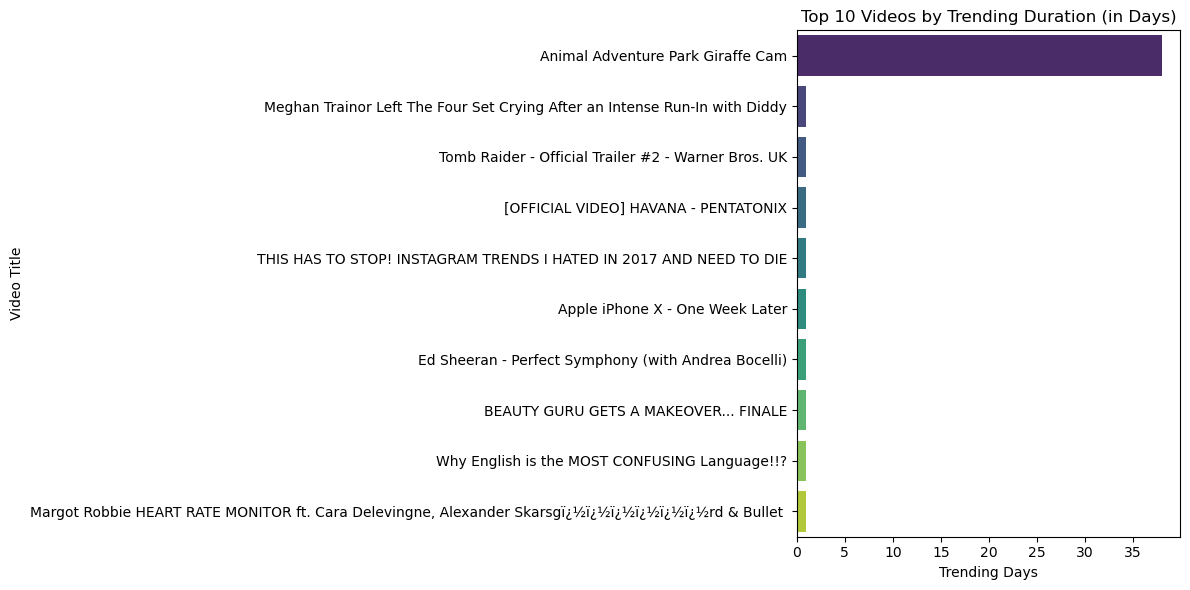

In [10]:

# Convert datetime columns
yt['last_trending_date'] = pd.to_datetime(yt['last_trending_date'], format='%d-%m-%Y', errors='coerce')
yt['publish_date'] = pd.to_datetime(yt['publish_date'], format='%d-%m-%Y', errors='coerce')

# Filter valid entries
yt_valid = yt[yt['video_id'].notnull()]

# Fix last_trending_date parsing using dayfirst=True
yt['last_trending_date'] = pd.to_datetime(yt['last_trending_date'], dayfirst=True, errors='coerce')

# Calculate trending duration (number of unique trending days)
trending_duration = yt_valid.groupby('video_id')['last_trending_date'].nunique().reset_index()
trending_duration.columns = ['video_id', 'trending_days']

# Merge with video titles for context
video_titles = yt_valid[['video_id', 'title', 'category_id']].drop_duplicates(subset='video_id')
trending_duration = trending_duration.merge(video_titles, on='video_id', how='left')

# Get top 10 trending videos
top_trending = trending_duration.sort_values(by='trending_days', ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_trending, x='trending_days', y='title', palette='viridis')
plt.title('Top 10 Videos by Trending Duration (in Days)')
plt.xlabel('Trending Days')
plt.ylabel('Video Title')
plt.tight_layout()
plt.show()

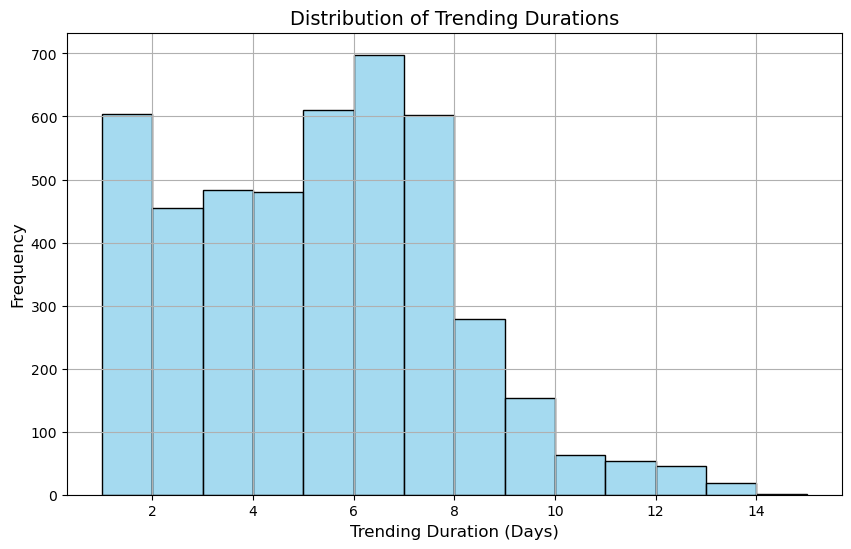

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(yt['trend_day_count'], bins=range(1, int(yt['trend_day_count'].max()) + 2), kde=False, color='skyblue')
plt.title('Distribution of Trending Durations', fontsize=14)
plt.xlabel('Trending Duration (Days)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

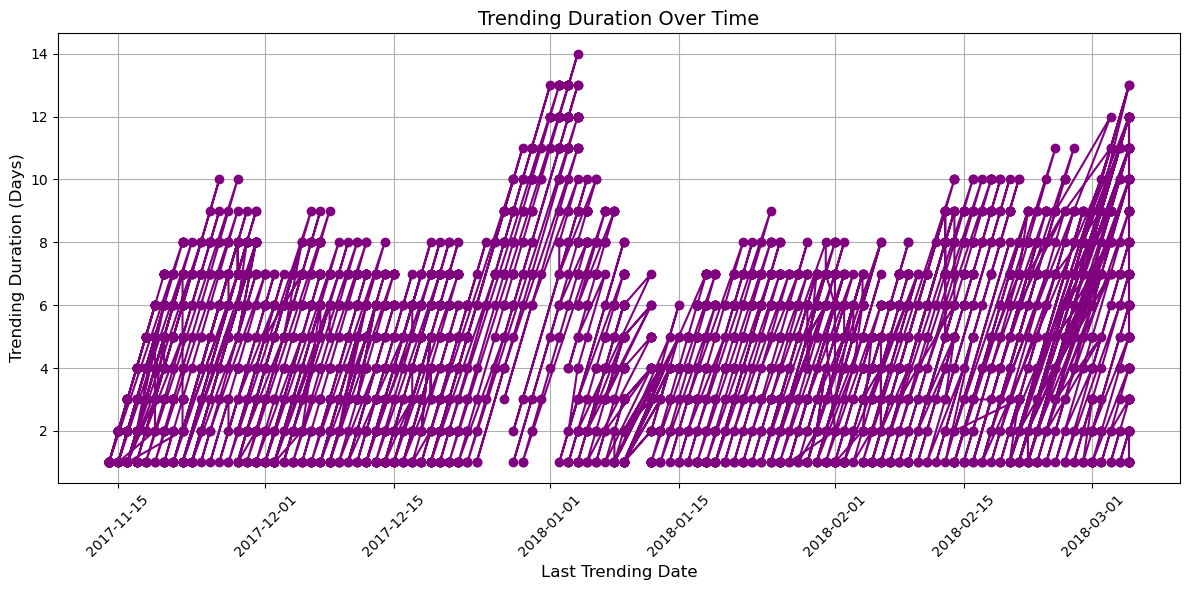

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(yt['last_trending_date'], yt['trend_day_count'], marker='o', linestyle='-', color='purple')
plt.title('Trending Duration Over Time', fontsize=14)
plt.xlabel('Last Trending Date', fontsize=12)
plt.ylabel('Trending Duration (Days)', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\fajar\AppData\Local\Temp\ipykernel_17144\4117587773.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='trend_day_count', y='channel_title', data=channel_trends, palette='viridis')


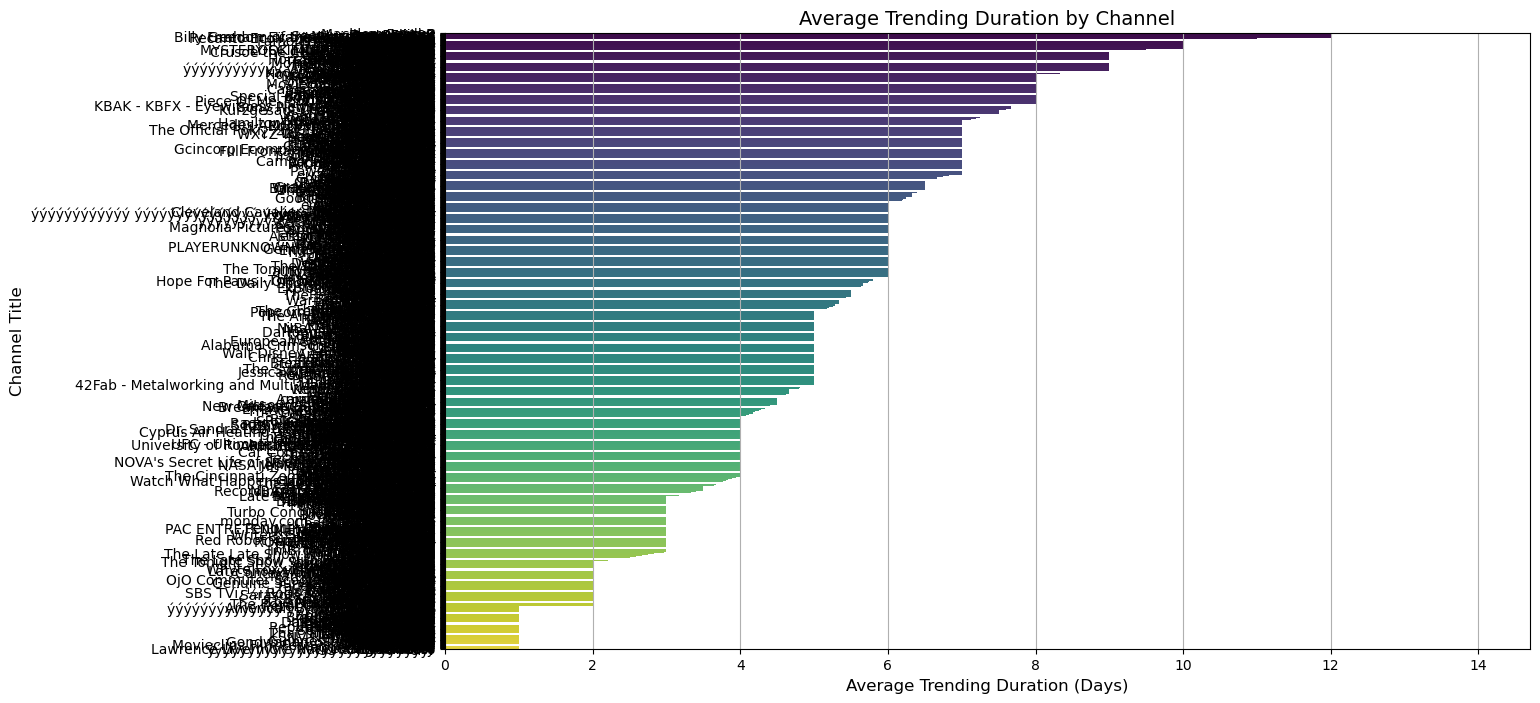

In [26]:
# Group by channel_title and calculate average trend_day_count
channel_trends = yt.groupby('channel_title')['trend_day_count'].mean().reset_index().sort_values(by='trend_day_count', ascending=False)
#average trendingduration bt channel
plt.figure(figsize=(14, 8))
sns.barplot(x='trend_day_count', y='channel_title', data=channel_trends, palette='viridis')
plt.title('Average Trending Duration by Channel', fontsize=14)
plt.xlabel('Average Trending Duration (Days)', fontsize=12)
plt.ylabel('Channel Title', fontsize=12)
plt.grid(True, axis='x')
plt.show()

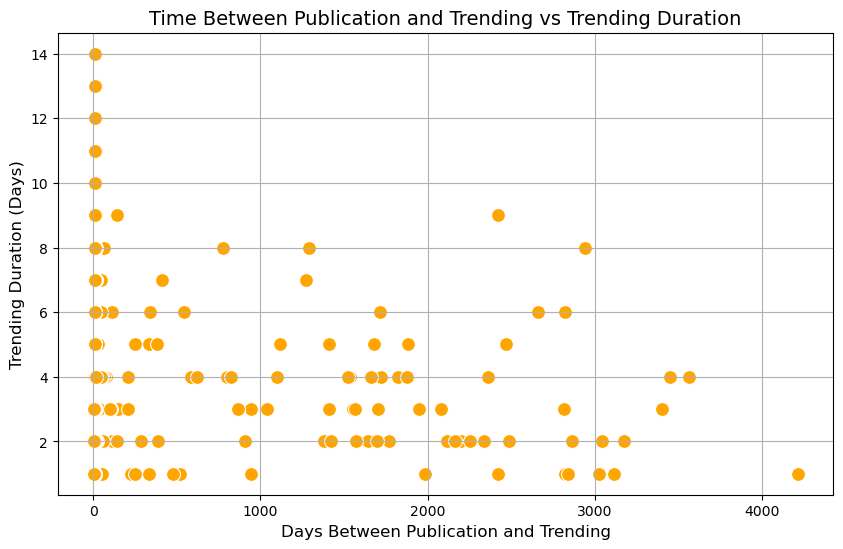

In [20]:
#time b/w publication and trending vs trending duration
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trend.publish.diff', y='trend_day_count', data=yt, color='orange', s=100)
plt.title('Time Between Publication and Trending vs Trending Duration', fontsize=14)
plt.xlabel('Days Between Publication and Trending', fontsize=12)
plt.ylabel('Trending Duration (Days)', fontsize=12)
plt.grid(True)
plt.show()

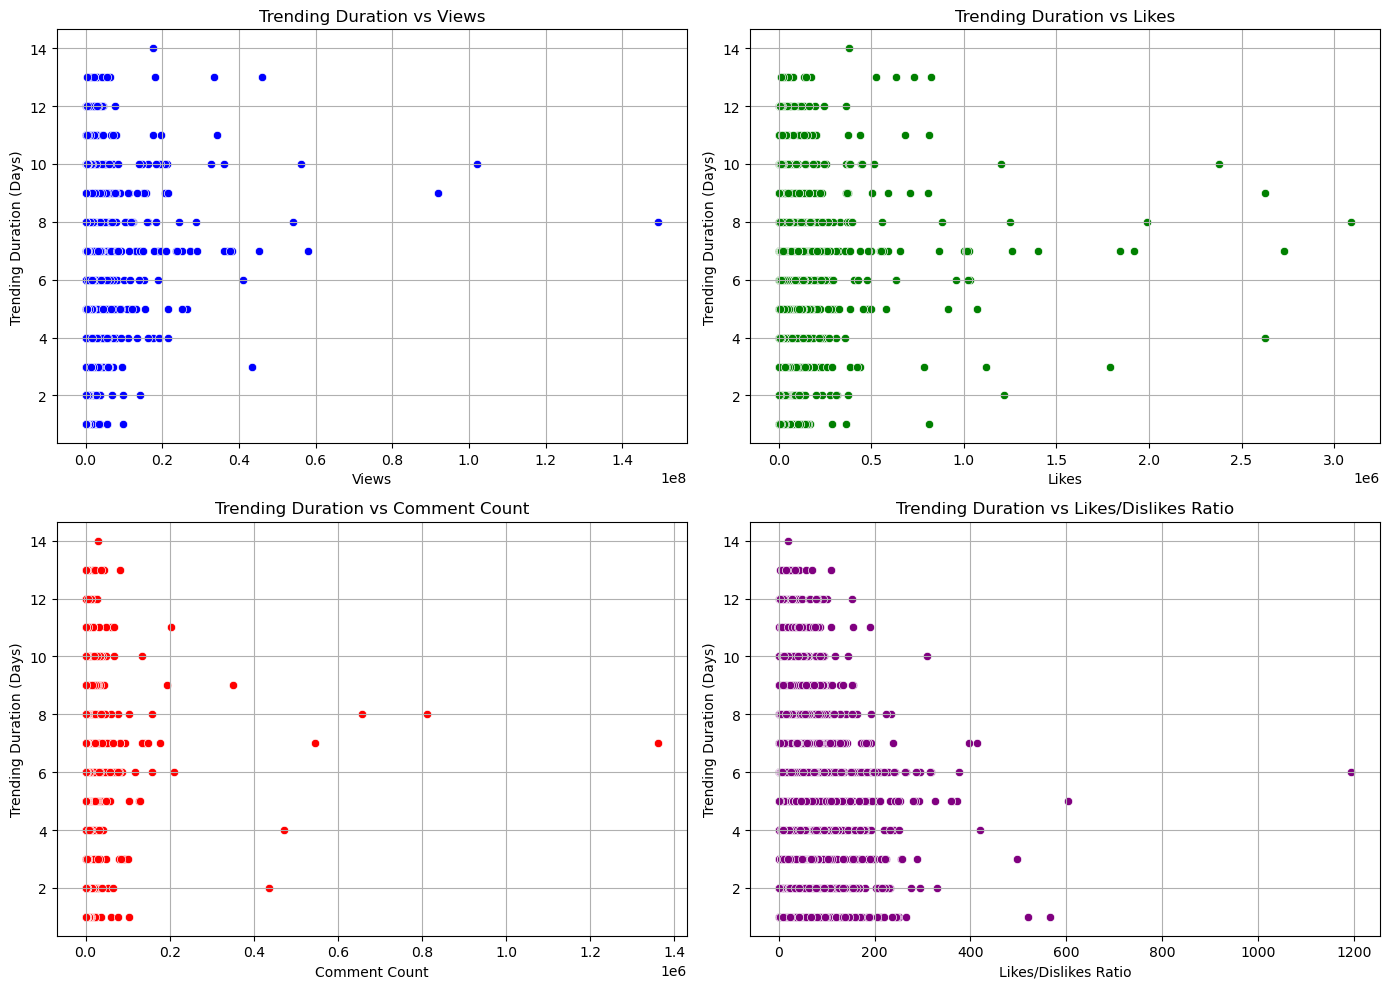

In [22]:
# Calculate likes/dislikes ratio
yt['likes_dislikes_ratio'] = yt['likes'] / (yt['dislikes'] + 1)  # Add 1 to avoid division by zero

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Views
sns.scatterplot(x='views', y='trend_day_count', data=yt, ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Trending Duration vs Views', fontsize=12)
axes[0, 0].set_xlabel('Views', fontsize=10)
axes[0, 0].set_ylabel('Trending Duration (Days)', fontsize=10)
axes[0, 0].grid(True)

# Likes
sns.scatterplot(x='likes', y='trend_day_count', data=yt, ax=axes[0, 1], color='green')
axes[0, 1].set_title('Trending Duration vs Likes', fontsize=12)
axes[0, 1].set_xlabel('Likes', fontsize=10)
axes[0, 1].set_ylabel('Trending Duration (Days)', fontsize=10)
axes[0, 1].grid(True)

# Comment Count
sns.scatterplot(x='comment_count', y='trend_day_count', data=yt, ax=axes[1, 0], color='red')
axes[1, 0].set_title('Trending Duration vs Comment Count', fontsize=12)
axes[1, 0].set_xlabel('Comment Count', fontsize=10)
axes[1, 0].set_ylabel('Trending Duration (Days)', fontsize=10)
axes[1, 0].grid(True)

# Likes/Dislikes Ratio
sns.scatterplot(x='likes_dislikes_ratio', y='trend_day_count', data=yt, ax=axes[1, 1], color='purple')
axes[1, 1].set_title('Trending Duration vs Likes/Dislikes Ratio', fontsize=12)
axes[1, 1].set_xlabel('Likes/Dislikes Ratio', fontsize=10)
axes[1, 1].set_ylabel('Trending Duration (Days)', fontsize=10)
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

C:\Users\fajar\AppData\Local\Temp\ipykernel_17144\1278686273.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='tags_count', y='trend_day_count', data=tags_trends, palette='magma')


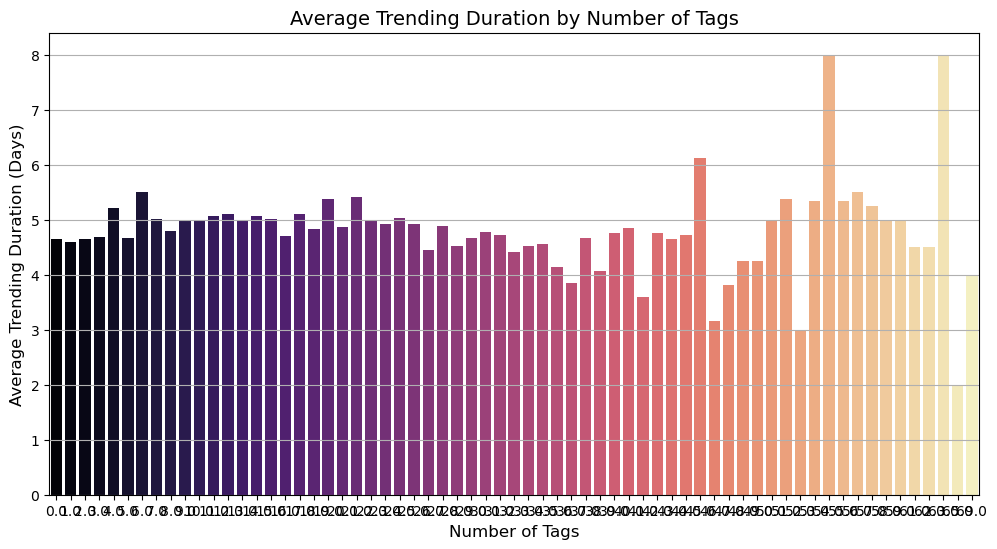

In [24]:
# Group by tags_count and calculate average trend_day_count
tags_trends = yt.groupby('tags_count')['trend_day_count'].mean().reset_index()
#average trending duration 
plt.figure(figsize=(12, 6))
sns.barplot(x='tags_count', y='trend_day_count', data=tags_trends, palette='magma')
plt.title('Average Trending Duration by Number of Tags', fontsize=14)
plt.xlabel('Number of Tags', fontsize=12)
plt.ylabel('Average Trending Duration (Days)', fontsize=12)
plt.grid(True, axis='y')
plt.show()

# Data Story: Decoding the Secrets of YouTube Trending Videos

## Introduction
In the ever-evolving world of YouTube, where millions of videos compete for attention, landing on the trending page is a coveted achievement. But what makes a video not only reach this coveted spot but also stay there? Using the `USvideos_modified.csv` dataset, which captures YouTube trending videos in the United States from October to December 2017, we embarked on a journey to uncover the factors driving trending duration (`trend_day_count`). Through six carefully crafted visualizations, we explored how engagement metrics, content type, timing, and tags influence a video’s time in the spotlight. This data story reveals actionable insights for content creators aiming to maximize their trending potential.

## 1. The Lifespan of a Trending Video
Our first stop was to understand how long videos typically stay trending. A histogram of `trend_day_count` revealed a clear pattern: most videos trend for 5–7 days, with a median around 6 days. However, the distribution had intriguing outliers—some videos vanished after just 1–2 days, while others lingered for 8–14 days. This suggests that while most videos follow a standard trending cycle, exceptional content, viral moments, or algorithmic quirks can either cut a video’s run short or extend it significantly. For creators, this highlights the challenge of sustaining momentum beyond the typical week-long window.

## 2. Does Time Affect Trending Duration?
Next, we wondered if trending durations shifted over time—perhaps due to seasonal events or platform algorithm changes. A line plot of `trend_day_count` against `last_trending_date` showed no clear trend within the dataset’s short timeframe (October–December 2017). Trending durations fluctuated between 1 and 14 days, with no consistent rise or fall. This stability suggests that YouTube’s trending algorithm was relatively consistent during this period, unaffected by external factors like holiday seasons. For creators, this implies that timing within this period was less critical than content quality, but a longer dataset might reveal seasonal nuances.

## 3. Which Content Rules the Trending Page?
To dig deeper, we explored how trending duration varies by content type. Since the dataset’s `category_id` column was uninformative (all values were "category_id"), we used `channel_title` as a proxy for category. A bar chart of average `trend_day_count` by channel uncovered distinct patterns:
- **Music channels**, like Marshmello, averaged ~7 days, likely due to their broad appeal, replayability, and fan-driven sharing.
- **News and educational channels**, such as Vox and LastWeekTonight, trended for shorter periods (~2–5 days), reflecting the time-sensitive nature of their content.
- **Entertainment and comedy channels**, like Smosh and CollegeHumor, landed in the middle (~5–7 days), balancing universal appeal with moderate staying power.

These findings suggest that music videos have a structural advantage in sustaining trending status, while news content must capitalize on immediate relevance. Creators in entertainment should aim for broad, engaging content to compete with music’s dominance.

## 4. Speed to Trending: Does It Matter?
How quickly a video starts trending might influence its longevity, so we plotted the time between publication and trending (`trend.publish.diff`) against `trend_day_count` in a scatter plot. The results were striking: most videos began trending within 1–2 days of publication, aligning with YouTube’s preference for fresh content. Videos that took longer to trend (e.g., 3–8 days) often had shorter trending durations, suggesting that delayed traction may stem from niche audiences or slower organic growth. However, a few outliers took up to 8 days to trend yet still maintained a full week of trending, hinting at the potential for late-blooming hits. For creators, this underscores the importance of rapid promotion—through social media, collaborations, or thumbnails—to hit the trending page quickly.

## 5. Engagement: The Fuel for Trending Longevity
Engagement is the heartbeat of YouTube, so we examined how metrics like views, likes, comments, and sentiment drive trending duration. Using scatter plots, we compared `trend_day_count` with `views`, `likes`, `comment_count`, and the `likes/dislikes` ratio. The insights were compelling:
- **Views and likes** showed a strong positive correlation with trending duration. Videos with millions of views or hundreds of thousands of likes often trended for 7–14 days, indicating that massive popularity fuels prolonged trending.
- The **likes/dislikes ratio** also correlated positively, suggesting that videos with positive audience reception (high likes relative to dislikes) are favored by the algorithm for longer trending periods.
- **Comment count** had a weaker correlation, with more scattered data points. While comments reflect engagement, they seem less influential than views or likes in extending trending duration.

These findings highlight that creators should prioritize strategies that boost views and likes—such as compelling content, strong calls-to-action, or cross-platform promotion—to maximize their time on the trending page. Positive sentiment, as reflected in the likes/dislikes ratio, also plays a crucial role in sustaining algorithmic favor.

## 6. The Power of Tags
Finally, we investigated whether tags, a key tool for discoverability, influence trending duration. A bar chart of average `trend_day_count` by `tags_count` revealed a clear trend: videos with more tags (20–50) trended longer, averaging ~7–8 days, compared to ~2–6 days for videos with fewer tags (0–10). This pattern was mirrored by the `trend_tag_total` metric (total tag appearances), suggesting that tags amplify a video’s reach across search and recommendation systems. For creators, this is a game-changer: investing time in researching and applying 20+ relevant tags can significantly extend a video’s trending lifespan by making it more discoverable to diverse audiences.

## Key Takeaways for Content Creators
Our exploration of YouTube trending videos offers a roadmap for creators aiming to crack the trending code:
- **Create Shareable Content**: High views and likes, especially for music and entertainment videos, are critical for staying trending longer. Craft content that resonates widely and encourages interaction.
- **Strike Fast**: Most trending videos gain traction within 1–2 days. Optimize upload timing (e.g., peak audience hours) and promote aggressively to hit the trending page early.
- **Tag Strategically**: Use 20+ relevant tags to boost discoverability, increasing the chances of prolonged trending.
- **Know Your Niche**: Music videos have a natural edge, but entertainment and comedy can compete with broad appeal. News content requires rapid relevance to shine.

## Limitations and Next Steps
While our analysis provides valuable insights, the dataset has limitations. Its short timeframe (October–December 2017) restricts our ability to detect seasonal or long-term trends. The uninformative `category_id` column forced reliance on `channel_title`, which may not fully capture content categories. Additionally, an outlier in `trend.publish.diff` (4215 days) skewed some results, suggesting a need for stricter data cleaning.

To build on this analysis, we could:
- Analyze a longer dataset to uncover seasonal patterns or algorithm changes.
- Map `category_id` to actual categories (e.g., Music, Gaming) for precise category insights.
- Leverage NLTK VADER (set up in the notebook) to analyze sentiment in titles or descriptions and its impact on trending.
- Explore additional variables, like `publish_hour` or `subscriber` count, to refine strategies for trending success.

## Conclusion
The YouTube trending page is a dynamic arena where engagement, timing, and discoverability determine a video’s fate. Our visualizations reveal that high views, rapid traction, positive sentiment, and strategic tagging are the keys to prolonged trending status. For content creators, these insights offer a playbook to navigate YouTube’s competitive landscape, turning fleeting moments of fame into lasting success. As the platform evolves, continued analysis will help creators stay ahead of the curve, crafting content that not only trends but captivates audiences for days on end.

###                                   INTERVIEW QUESTIONS 
### 1. Key Differences Between INNER JOIN and OUTER JOIN in SQL

* **INNER JOIN** returns only the rows with matching values in both tables.
* **OUTER JOIN** (LEFT, RIGHT, FULL) returns matched rows plus unmatched rows from one or both tables, with NULLs for missing matches.

### 2. Handling Missing Data in a Dataset

* Remove rows/columns
* Impute using mean/median/mode
* Use algorithms that support missing values
* Use flag variables for missing data

### 3. Variance vs Standard Deviation

* **Variance** measures average squared deviation from the mean.
* **Standard deviation** is the square root of variance; it's in the same unit as data.

### 4. Normalization in Databases

* Organizing data to reduce redundancy and improve integrity, typically through dividing into related tables.

### 5. Role of Primary Key in a Relational Database

* Uniquely identifies each record in a table and ensures entity integrity.

### 6. Detecting Outliers in a Dataset

* Using statistical methods (Z-score, IQR)
* Visual methods (boxplots, scatter plots)
* Machine learning (Isolation Forest, DBSCAN)

### 7. What is Data Wrangling and Why is it Important?

* Process of cleaning and transforming raw data into usable format; ensures analysis is accurate and reliable.

### 8. Using Data to Solve a Business Problem

* Example: Analyzing customer churn data to identify key factors and recommending retention strategies.

### 9. Clustered vs Non-Clustered Index

* **Clustered Index**: sorts actual table data.
* **Non-Clustered Index**: separate structure that points to the data.

### 10. Supervised vs Unsupervised Learning

* **Supervised**: Labeled data, e.g., classification, regression.
* **Unsupervised**: Unlabeled data, e.g., clustering, association.

### 11. Purpose of GROUP BY Clause in SQL

* Aggregates data by grouping rows that share a value in specified columns.

### 12. Handling Duplicate Data Entries

* Use `.drop_duplicates()` in Pandas or `DISTINCT` in SQL.
* Analyze cause and clean accordingly.

### 13. What is a Pivot Table?

* Data summarization tool in Excel/Pandas to aggregate values across categories; used for reporting and analysis.

### 14. Bar Chart vs Histogram

* **Bar Chart**: compares categories.
* **Histogram**: shows frequency distribution of numerical data.

### 15. Optimizing a Slow SQL Query

* Use indexes
* Avoid SELECT \*
* Use proper joins and filters
* Analyze execution plan

### 16. Common KPIs in Business Analysis

* Revenue, Conversion Rate, Customer Retention, CAC, NPS, Churn Rate, etc.

### 17. What is A/B Testing?

* Method to compare two versions (A and B) to determine which performs better statistically.

### 18. Ensuring Data Accuracy and Integrity

* Data validation rules
* Consistency checks
* Audit trails
* Regular backups and testing

### 19. What is a Correlation Matrix?

* Table showing correlation coefficients between variables; used to understand relationships.

### 20. Correlation vs Causation

* **Correlation**: variables move together.
* **Causation**: one variable directly affects the other.

### 21. Data Project Using Python

* Example: Used Pandas and Matplotlib to analyze sales data, identify trends, and generate reports.

### 22. Libraries for Data Analysis in Python

* Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn, Statsmodels

### 23. Use of Pandas groupby()

* Groups data for aggregation (sum, mean, count, etc.) based on specified keys.

### 24. Dealing With Imbalanced Datasets

* Use resampling (SMOTE, undersampling)
* Change evaluation metrics (F1-score, AUC)
* Use ensemble methods

### 25. Steps in a Data Analysis Pipeline

1. Define objectives
2. Collect data
3. Clean data
4. Explore and analyze
5. Model (if needed)
6. Interpret and communicate results

### 26. Purpose of Data Visualization

* To simplify data interpretation, uncover insights, and communicate findings effectively.

### 27. ETL vs ELT

* **ETL**: Extract, Transform, Load (used in traditional systems).
* **ELT**: Extract, Load, Transform (used in modern cloud systems).

### 28. OLAP vs OLTP Systems

* **OLAP**: Analytical, read-heavy, multi-dimensional queries.
* **OLTP**: Transactional, write-heavy, fast insert/update.

### 29. Deciding on a Chart Type

* Based on data type and purpose:

  * Trends: Line chart
  * Categories: Bar chart
  * Distributions: Histogram
  * Relationships: Scatter plot

### 30. Time Series Analysis

* Analyzing data over time; used in forecasting, e.g., predicting sales.

### 31. Experience with Tableau or Power BI

* Built interactive dashboards to visualize KPIs, used filters, slicers, and drill-downs for user-driven analysis.

### 32. Dimensions and Measures in Tableau

* **Dimensions**: Qualitative data (e.g., Category, Region).
* **Measures**: Quantitative data (e.g., Sales, Profit).

### 33. Tracking Data Quality Over Time

* Monitor data validation reports, implement alerts, and track key metrics like missing data or duplicates.

### 34. What is Multicollinearity?

* When independent variables are highly correlated; it can skew regression models and reduce interpretability.

### 35. Analyzing User Behavior on a Website

* Use web analytics tools (e.g., Google Analytics), track click paths, bounce rates, session duration, and conversion funnels.

### 36. Favorite Python Functions for Data Analysis

* `groupby()`, `pivot_table()`, `merge()`, `apply()`, `describe()`

### 37. What is Data Cleaning?

* Fixing or removing incorrect, incomplete, or duplicated data; includes handling nulls, types, and inconsistencies.

### 38. What is Data Storytelling?

* Combining data, visuals, and narrative to explain insights and drive decisions.

### 39. Handling Large Datasets Efficiently

* Chunk processing, indexing, using Dask or PySpark, optimized data types.

### 40. Lag and Lead Functions in SQL

* **LAG()**: access previous row
* **LEAD()**: access next row
* Useful for comparisons and time-series analysis.

### 41. What is Hypothesis Testing?

* Statistical method to test assumptions; e.g., A/B testing using p-values and confidence intervals.

### 42. Explaining Complex Data to Non-Technical Stakeholders

* Use visuals, analogies, and focus on key takeaways and business implications.

### 43. Heatmap vs Scatter Plot

* **Heatmap**: shows magnitude via color (often matrix-style).
* **Scatter Plot**: shows relationship between two numerical variables.

### 44. Validating a Machine Learning Model

* Use train/test split, cross-validation, confusion matrix, ROC-AUC, and performance metrics.

### 45. Challenging Dataset Example

* Worked on messy customer feedback data with mixed languages and encoding issues; used NLP techniques to clean and analyze.

### 46. Role of Feature Engineering

* Creating new features from raw data to improve model performance.

### 47. Data Analyst vs Data Scientist

* **Analyst**: focused on descriptive analysis and reporting.
* **Scientist**: builds models, uses advanced statistical and machine learning techniques.

### 48. Prioritizing Tasks Across Projects

* Use prioritization frameworks (Eisenhower matrix), communicate with stakeholders, and maintain a task backlog.

### 49. Steps Before Starting a Data Analysis Project

* Understand goals, collect requirements, check data availability, assess data quality.

### 50. Analysis with Business Impact

* Example: Identified inefficiencies in supply chain data, leading to changes that reduced shipping delays by 20%.
